IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

DATA COLLECTION

In [2]:
df=pd.read_csv("D:\Projects\Disease prediction\heart_dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:

df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
X = df.drop(columns='target',axis=1)
Y = df['target']

In [11]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [12]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


DATA SPLITTING

In [13]:
X_train , X_test , Y_train , Y_test = train_test_split ( X , Y , test_size=0.2 , random_state=2 )

In [14]:
print("The dataset has ",X.shape," no of rows and columns")
print("The training dataset has ",X_train.shape," no of rows and columns")
print("The testing dataset has ",X_test.shape," no of rows and columns")

The dataset has  (1025, 13)  no of rows and columns
The training dataset has  (820, 13)  no of rows and columns
The testing dataset has  (205, 13)  no of rows and columns


In [15]:
print("The dataset has ",Y.shape," no of rows and columns")
print("The training dataset has ",Y_train.shape," no of rows and columns")
print("The testing dataset has ",Y_test.shape," no of rows and columns")

The dataset has  (1025,)  no of rows and columns
The training dataset has  (820,)  no of rows and columns
The testing dataset has  (205,)  no of rows and columns


DATA SCALING and PREPROCESSING

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)

X_test_std=scaler.transform(X_test)

In [18]:
print(X_train_std)

[[ 0.16856381  0.68138514  0.06823285 ... -2.23202634 -0.72853503
  -0.52277804]
 [-0.27552399  0.68138514  1.04982822 ...  0.98743118  3.12565027
  -0.52277804]
 [-0.16450204  0.68138514  1.04982822 ...  0.98743118  2.16210395
  -0.52277804]
 ...
 [ 0.05754186  0.68138514 -0.91336252 ... -0.62229758  0.2350113
   1.09487477]
 [ 0.05754186  0.68138514 -0.91336252 ... -0.62229758  0.2350113
   1.09487477]
 [ 0.83469552 -1.46759877 -0.91336252 ...  0.98743118 -0.72853503
  -0.52277804]]


In [19]:
print(X_test_std)

[[ 1.72287112  0.68138514 -0.91336252 ... -0.62229758  2.16210395
  -0.52277804]
 [ 0.27958576  0.68138514 -0.91336252 ... -0.62229758 -0.72853503
  -2.14043085]
 [ 0.83469552  0.68138514 -0.91336252 ... -0.62229758  1.19855762
   1.09487477]
 ...
 [-0.60858984 -1.46759877  0.06823285 ... -0.62229758 -0.72853503
  -0.52277804]
 [-0.38654594  0.68138514  1.04982822 ... -0.62229758 -0.72853503
  -0.52277804]
 [-0.05348009  0.68138514 -0.91336252 ... -0.62229758  0.2350113
  -0.52277804]]


BUILDING NEURAL NETWORK

In [20]:
#tensorflow is a DL library developed by google
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

DEFINING STRUCTURE OF NEURAL NETWORK

In [21]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(13,)),     #  -> First/Input Layer of Neural Network
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),     #  -> Second/Hidden Layer of Neural Network
    keras.layers.Dense(2,activation='sigmoid')   #  -> Third/Output Layer of Neural Network
                                                 #  ->The number of neuron in output layer = No of classifier
])

COMPILING THE NEURAL NETWORK

In [22]:
model.compile( optimizer='adam' ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

TRAINING THE NEURAL NETWORK MODEL

In [23]:
history=model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
24/24 [==============================] - 2s 13ms/step - loss: 0.5453 - accuracy: 0.7764 - val_loss: 0.3547 - val_accuracy: 0.8902
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3807 - accuracy: 0.8333 - val_loss: 0.2392 - val_accuracy: 0.9390
Epoch 3/10
24/24 [==============================] - 0s 7ms/step - loss: 0.3320 - accuracy: 0.8523 - val_loss: 0.2297 - val_accuracy: 0.9390
Epoch 4/10
24/24 [==============================] - 0s 8ms/step - loss: 0.2953 - accuracy: 0.8672 - val_loss: 0.2032 - val_accuracy: 0.9390
Epoch 5/10
24/24 [==============================] - 0s 8ms/step - loss: 0.2624 - accuracy: 0.8930 - val_loss: 0.1865 - val_accuracy: 0.9390
Epoch 6/10
24/24 [==============================] - 0s 9ms/step - loss: 0.2348 - accuracy: 0.9024 - val_loss: 0.1804 - val_accuracy: 0.9390
Epoch 7/10
24/24 [==============================] - 0s 9ms/step - loss: 0.2068 - accuracy: 0.9282 - val_loss: 0.1437 - val_accuracy: 0.9512
Epoch 8/10
24/24 [=

VISUALIZING ACCURACY AND LOSS

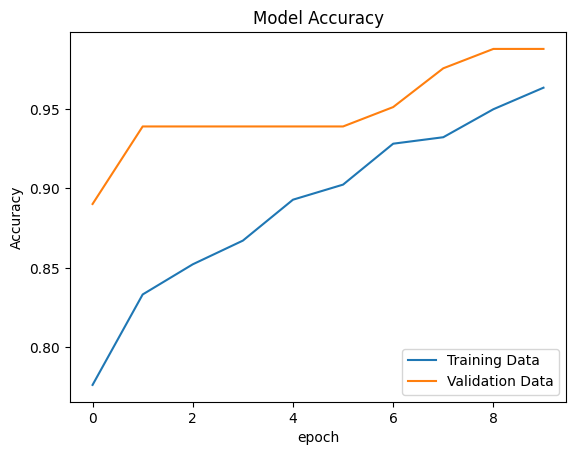

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'],loc='lower right')

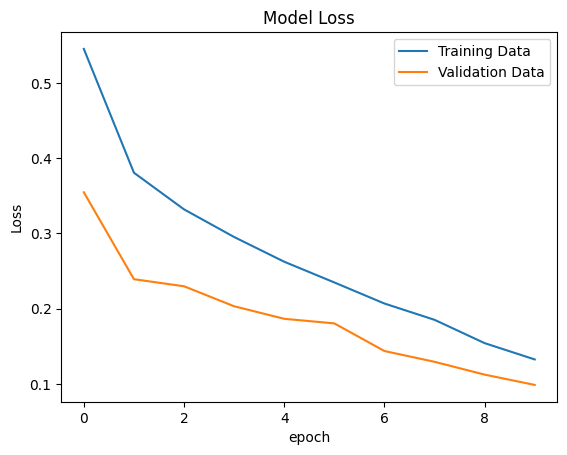

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'],loc='upper right')

In [26]:
loss,accuracy=model.evaluate(X_test_std,Y_test)
print(accuracy)
print("The Accuracy of our model is : ",accuracy*100,"%")

7/7 [==============================] - 0s 1ms/step - loss: 0.1380 - accuracy: 0.9854
0.9853658676147461
The Accuracy of our model is :  98.53658676147461 %


In [27]:
print(X_test_std.shape)

(205, 13)


In [28]:
print(X_test_std[0])

[ 1.72287112  0.68138514 -0.91336252 -0.08491216  1.51940083 -0.41201637
 -1.02383022 -1.72094573 -0.70258435  1.10703632 -0.62229758  2.16210395
 -0.52277804]


In [29]:
Y_pred =model.predict(X_test_std)

7/7 [==============================] - 0s 3ms/step


In [30]:
print(Y_pred.shape)

(205, 2)


In [31]:
print(X_test_std)

[[ 1.72287112  0.68138514 -0.91336252 ... -0.62229758  2.16210395
  -0.52277804]
 [ 0.27958576  0.68138514 -0.91336252 ... -0.62229758 -0.72853503
  -2.14043085]
 [ 0.83469552  0.68138514 -0.91336252 ... -0.62229758  1.19855762
   1.09487477]
 ...
 [-0.60858984 -1.46759877  0.06823285 ... -0.62229758 -0.72853503
  -0.52277804]
 [-0.38654594  0.68138514  1.04982822 ... -0.62229758 -0.72853503
  -0.52277804]
 [-0.05348009  0.68138514 -0.91336252 ... -0.62229758  0.2350113
  -0.52277804]]


In [32]:
print(Y_pred)

[[9.54298615e-01 1.50868505e-01]
 [3.33036155e-01 8.07680845e-01]
 [9.60029483e-01 3.88456061e-02]
 [9.54298615e-01 1.50868505e-01]
 [1.82159215e-01 9.94816065e-01]
 [2.35931665e-01 9.37232256e-01]
 [9.57823098e-01 1.09601542e-01]
 [9.59046841e-01 5.04719242e-02]
 [7.92708457e-01 2.91144639e-01]
 [3.57731491e-01 9.21702802e-01]
 [3.48788738e-01 9.01016355e-01]
 [8.85903656e-01 2.13874042e-01]
 [6.87573135e-01 3.88409138e-01]
 [4.48335618e-01 7.29522586e-01]
 [3.09729636e-01 9.55985963e-01]
 [3.90281290e-01 9.24043238e-01]
 [2.35527381e-01 9.75162566e-01]
 [7.47170806e-01 1.79995149e-01]
 [8.92786980e-02 9.98168588e-01]
 [5.57959735e-01 7.90628016e-01]
 [7.37946987e-01 8.40668917e-01]
 [9.74253863e-02 9.98923123e-01]
 [2.98833609e-01 9.30218279e-01]
 [9.01582658e-01 8.32607448e-02]
 [9.73793864e-01 5.44773936e-02]
 [8.04886043e-01 4.54546005e-01]
 [9.96096969e-01 4.19859402e-03]
 [5.54214716e-01 6.88890934e-01]
 [9.82894599e-01 2.24828087e-02]
 [6.57284021e-01 4.59613204e-01]
 [9.808459

COVERTING THE PREDICTION PROBABILITY OF EACH CLASS

In [33]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]  # -> argmax fuction gives the index of maximum value in a list

In [34]:
print(Y_pred_labels)

[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]


Predictive System

In [35]:
input=(52,1,0,128,204,1,1,156,1,1,1,0,0)

#change the input tuple to numpy array

input_numpy=np.asarray(input)

#reshaping the array so as to predict for one data point

input_reshaped=input_numpy.reshape(1,-1)

#standardizing the input data

input_std=scaler.transform(input_reshaped)


prediction = model.predict(input_std)

print(prediction)

prediction_label=[np.argmax(prediction)]
print(prediction_label)


if(prediction_label[0]==0):
  print("Person does not have heart disease")
else:
  print("Person has heart disease")



1/1 [==============================] - 0s 33ms/step
[[0.90867704 0.33955076]]
[0]
Person does not have heart disease


c:\Users\Sohard\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
